# 1 Author

**Student Name**:  Peter Stasiw

**Student ID**:  210864061



# 2 Problem formulation
Sometimes we have a song in our heads and we know what it sounds like, but we forget the name of the song. There are smartphone applications that can identify songs based on the actual musical piece, but detecting tunes from hums or whistles is still a novel idea (google are just launching their version).
Many people will appreciate a solution to this problem, as it is a common occurrence.

The Harry Potter and Star Wars theme tune are very different, thus, this a good starting point to test if there is a machine learning solution to distinguish between the two songs.

# 3 Machine Learning pipeline

1. Loading and cleaning of data
2. Organisation into a dataframe
3. Dataset is sampled
4. Features extracted from sample 
5. Sample features split into training and validation sub-sets
5. Standard scaling of features
6. Validation of both models on sample
7. Feature extraction from the entire dataframe 
8. Features from entire dataframe split into train and test subsets
9. Standard scaling of features
9. The best performing model from step 7 is trained on the train subset and validated on the test subset.

# 4 Transformation stage
Power, pitch mean, pitch standard deviation, zero-crossing rate mean and zero-crossing standard deviation will be the features extracted from the audio files to build predictors for the modeling step. 

Power is used to measure the variation in amplitude over the audio files. In this instance, it would be expected that the star wars song has more power than harry potter, as the song is supposed sound like a 'march'. This is why I consider this a good feature.

Pitch is what makes up a song, of which the mean and standard deviation of both songs is considered to be different as they use different notes in their melody.

Zero-crossing rate mean and standard deviation was chosen because it may detect some sort of rhythm in the audio which could help distinguish types of song. Similarly to the reasoning for power, the star wars song is supposed to sound like a march so would be expected to have more amplitudes that cross 0. 

Voiced region was considered, but deemed inappropriate as it may polarise the dataset into hums or whistles which was successful in classification in a prior machine learning model. MFCC was also considered but deemed inappropriate because it is more suitable to distinguishing different individuals rather than songs.

The extracted features will be standardised, as the feature values vary scales.

# 5 Modelling
The first model to be used is a support vector machine (SVM). This is useful in this particular case because SVM can make use of a non-linear boundary to classify the songs. The boundary is expected to be very convoluted, considering that the features from both songs may be similar.
Gridsearch will be used for hyperparameter C to find the most optimal margin for the best accuracy. 

The second model to be used is a k-nearest neighbours (KNN). It is hoped that this will give contrast to the SVM model above. KNN works in a very different way and compares neighbouring points to one-another rather than a boundary line.
Gridsearch will be used to find the most optimal number of neighbours to consider for the best accuracy. To limit overfitting, the trial k hyperparameters will not include 1 and list different values of k.

# 6 Methodology

The sample from the dataset issplit primarily into train and validation sets before modeling. This allows to see if overfitting is an issue in either model.

For both SVM and KNN, both accuracy and a confusion matrix is used to gauge the success. An accuracy of 0.5 is no better than a coin toss, with 1 being perfect. However a train accuracy of 1 is considered overfitting, hence a validation accuracy is more important.

# 7 Dataset

The raw data is in wav files, bundled together by song in zip files in 2 parts. The code is modifiable to add both parts, but for this problem only one part will be used to reduce computation. Once unzipped, only wav files will be used for further processing, expected to be named by a standard form. However, some of the files may have non-standard naming and unclean metadata, but for this basic problem, all we need is the name of the song to which the audio refers. Because each zip file audio bundle refers to only one song, these names need no cleaning for this problem. The file names will be retained and a dataframe created with the file name becoming an index. All of the songs in either starwars or potter folders will have their respective names (Potter or Wars) appended to the dataframe as a label, and then both dataframes combined into one dataframe for the transformation stage.

Before running the next steps, the dataset will be sampled for the validation set, after validation the full dataset will run on the best model.

## 7.1 Data Loading

In [5]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile
from sklearn.model_selection import GridSearchCV

import IPython.display as ipd
from tqdm import tqdm
import librosa
from sklearn import svm
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data/'
os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['Potter_1', 'StarWars_1', 'Combined']

In [ ]:
def unzip(directory_to_extract_to, zip_path):
  zip_name_ = zip_path.replace("/content/drive/MyDrive/Data/", "")
  zip_name = zip_name_.replace(".zip", "")
  with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to + str(zip_name))
  sample_path = zip_path.replace(".zip", '') + "/*.wav"
  files = glob.glob(sample_path)
  return files

### 7.1.1 Potter

In [ ]:
unzip("/content/drive/MyDrive/Data/", "/content/drive/MyDrive/Data/Potter_1.zip")

In [6]:
potter_1 = glob.glob("/content/drive/MyDrive/Data/Potter_1/*.wav") # Stops me having to unzip everytime i open notebook

In [7]:
potter_table = []

for file in potter_1:
  path = file
  song = "Potter"
  potter_table.append([path, song])

potter_df = pd.DataFrame(potter_table, columns = ['path', 'song'])
potter_df

,path,song
0,/content/drive/MyDrive/Data/Potter_1/S1_whistl...,Potter
1,/content/drive/MyDrive/Data/Potter_1/S1_hum_2_...,Potter
2,/content/drive/MyDrive/Data/Potter_1/S3_hum_1_...,Potter
3,/content/drive/MyDrive/Data/Potter_1/S3_hum_2_...,Potter
4,/content/drive/MyDrive/Data/Potter_1/S2_whistl...,Potter
...,...,...
201,/content/drive/MyDrive/Data/Potter_1/S111_hum_...,Potter
202,/content/drive/MyDrive/Data/Potter_1/S111_hum_...,Potter
203,/content/drive/MyDrive/Data/Potter_1/S114_hum_...,Potter
204,/content/drive/MyDrive/Data/Potter_1/S114_hum_...,Potter


### 7.1.2 Star Wars

In [ ]:
unzip("/content/drive/MyDrive/Data/", "/content/drive/MyDrive/Data/StarWars_1.zip")

In [8]:
wars_1 = glob.glob("/content/drive/MyDrive/Data/StarWars_1/*.wav")

In [9]:
wars_table = []

for file in wars_1:
  path = file
  song = "Wars"
  wars_table.append([path, song])

wars_df = pd.DataFrame(wars_table, columns = ['path', 'song'])
wars_df

,path,song
0,/content/drive/MyDrive/Data/StarWars_1/S42_Hum...,Wars
1,/content/drive/MyDrive/Data/StarWars_1/S3_hum_...,Wars
2,/content/drive/MyDrive/Data/StarWars_1/S1_whis...,Wars
3,/content/drive/MyDrive/Data/StarWars_1/S1_hum_...,Wars
4,/content/drive/MyDrive/Data/StarWars_1/S3_hum_...,Wars
...,...,...
204,/content/drive/MyDrive/Data/StarWars_1/S111_hu...,Wars
205,/content/drive/MyDrive/Data/StarWars_1/S111_hu...,Wars
206,/content/drive/MyDrive/Data/StarWars_1/S114_hu...,Wars
207,/content/drive/MyDrive/Data/StarWars_1/S114_hu...,Wars


In [10]:
combined = potter_df.append(wars_df, ignore_index = True)
combined

,path,song
0,/content/drive/MyDrive/Data/Potter_1/S1_whistl...,Potter
1,/content/drive/MyDrive/Data/Potter_1/S1_hum_2_...,Potter
2,/content/drive/MyDrive/Data/Potter_1/S3_hum_1_...,Potter
3,/content/drive/MyDrive/Data/Potter_1/S3_hum_2_...,Potter
4,/content/drive/MyDrive/Data/Potter_1/S2_whistl...,Potter
...,...,...
410,/content/drive/MyDrive/Data/StarWars_1/S111_hu...,Wars
411,/content/drive/MyDrive/Data/StarWars_1/S111_hu...,Wars
412,/content/drive/MyDrive/Data/StarWars_1/S114_hu...,Wars
413,/content/drive/MyDrive/Data/StarWars_1/S114_hu...,Wars


In [11]:
sample = combined.sample(frac=0.2, random_state=2).reset_index(drop=True)
sample

,path,song
0,/content/drive/MyDrive/Data/Potter_1/S114_hum_...,Potter
1,/content/drive/MyDrive/Data/StarWars_1/S66_whi...,Wars
2,/content/drive/MyDrive/Data/StarWars_1/S40_hum...,Wars
3,/content/drive/MyDrive/Data/Potter_1/S19_hum_2...,Potter
4,/content/drive/MyDrive/Data/Potter_1/S100_hum_...,Potter
...,...,...
78,/content/drive/MyDrive/Data/StarWars_1/S103_hu...,Wars
79,/content/drive/MyDrive/Data/StarWars_1/S25_hum...,Wars
80,/content/drive/MyDrive/Data/Potter_1/S23_hum_2...,Potter
81,/content/drive/MyDrive/Data/Potter_1/S9_hum_2_...,Potter


## 7.2 Feature Extraction 

In [12]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=1000, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

In [13]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  row = 0
  while row < len(files):
    #print(row)
    file = files.loc[row, 'path']
    #print(file) # to see progress
    yi = labels_file.loc[row]['song']=='Potter'
    #print(yi)


    fs = None # if None, fs would be 22050
    x, fs = librosa.load(file,sr=fs)
    if scale_audio: x = x/np.max(np.abs(x))
    f0, voiced_flag = getPitch(x,fs,winLen=0.02)
    zero_rate = librosa.feature.zero_crossing_rate(x) # one computation instead of two for the below mean and std
      
    power = np.sum(x**2)/len(x)
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
    pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
    
    zero_rate_mean = np.mean(zero_rate) # how many times it crosses 0
    zero_rate_std = np.std(zero_rate)

    xi = [power,pitch_mean,pitch_std,zero_rate_mean, zero_rate_std]
    X.append(xi)
    y.append(yi)
    row +=1

  print("Done!")
  return np.array(X),np.array(y)

In [14]:
X,y = getXy(sample, labels_file=sample, scale_audio=True, onlySingleDigit=True)

Done!


In [15]:
X_df = pd.DataFrame(X)
Y_df = pd.DataFrame(y)

vis = X_df.assign(Potter = Y_df)
vis

,0,1,2,3,4,Potter
0,0.030767,185.219418,42.258869,0.021322,0.062638,True
1,0.028813,713.470184,67.384086,0.063478,0.015391,False
2,0.040074,240.510562,66.773074,0.052206,0.095778,False
3,0.029437,379.573125,94.622804,0.032909,0.031915,True
4,0.004869,181.126026,69.029769,0.044665,0.087881,True
...,...,...,...,...,...,...
78,0.015994,157.726743,24.849207,0.058705,0.085293,False
79,0.015866,244.136968,89.269956,0.057943,0.104440,False
80,0.070562,323.198052,235.795126,0.025374,0.116595,True
81,0.015798,143.427624,40.319357,0.055529,0.062932,True


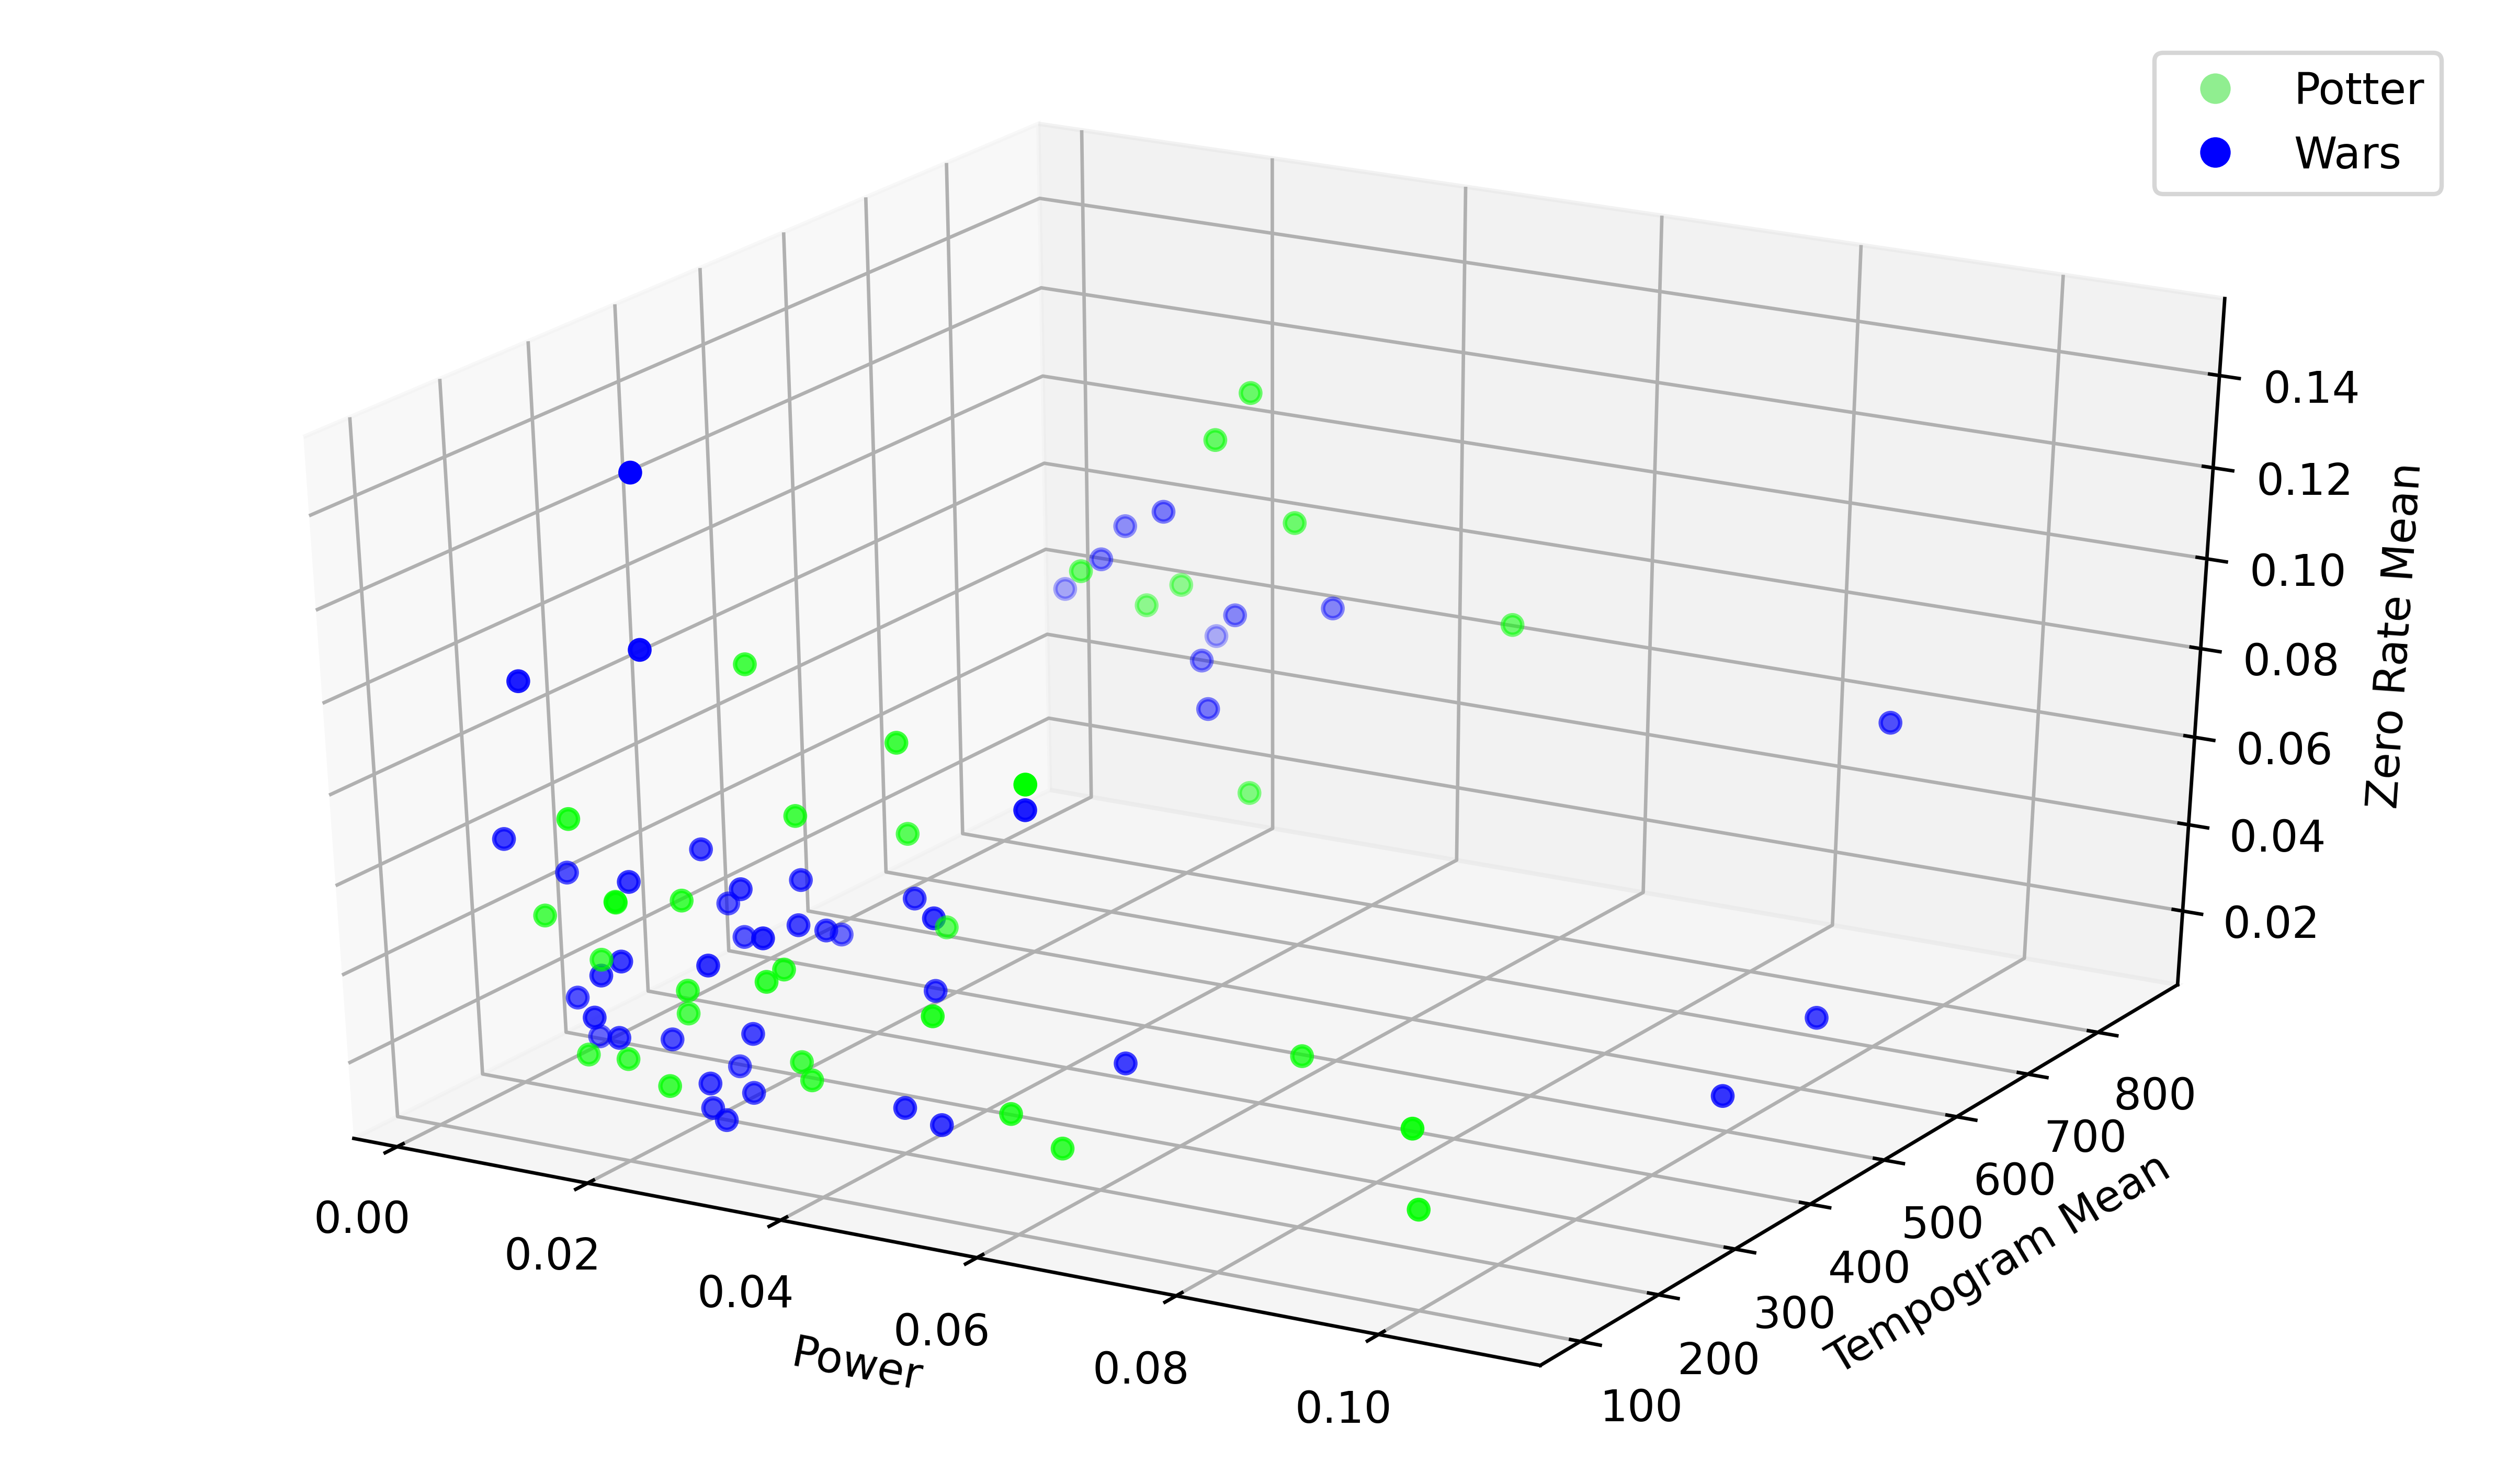

In [16]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=8, label='Potter'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=8, label='Wars')]

fig = plt.figure(figsize=(10,6), dpi=600)
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(vis[0],vis[1],vis[3],c=vis.Potter,cmap='brg',s=20)
ax.set_xlabel('Power')
ax.set_ylabel('Tempogram Mean')
ax.set_zlabel('Zero Rate Mean')
ax.legend(legend_elements, ['Potter', 'Wars'])
plt.show()

The figure shows three of the five features. It is not possible to see more than three dimensions. This figure is just to indicate the spread of the data. We can see that there is not clear grouping of the songs being Potter or not, meaning that classification may be difficult.

#### 7.2.1 Standardisation

In [17]:
def standardise(X):
  mean = X.mean(0)
  sd = X.std(0)
  return (X - mean)/sd

In [19]:
X_train_, X_val_, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=2)

X_train = standardise(X_train_)  ### normalise after splitting
X_val = standardise(X_val_)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((58, 5), (25, 5), (58,), (25,))

# 8 Results

## 8.1 Validation

### 8.1.1 SVM

In [20]:
model  = svm.SVC(random_state = 3)

param = {'C': [1,2,4,6,8,10]}
svm_cv = GridSearchCV(model, param, cv=5)
svm_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(svm_cv.best_params_))
print('Average training accuracy across folds of best hyperparameter setting: {0}.'.format(svm_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(svm_cv.score(X_val, y_val)))

Best hyperparameter setting: {'C': 1}.
Average training accuracy across folds of best hyperparameter setting: 0.5166666666666667.
Validation dataset accuracy of best hyperparameter setting: 0.6.


In [21]:
svm_done = svm.SVC(random_state = 4, C=1)
svm_done.fit(X_train, y_train)

SVC(C=1, random_state=4)

In [22]:
from sklearn.metrics import confusion_matrix

y_pred = svm_done.predict(X_val)
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('Confusion matrix SVM:')
display(df)

Confusion matrix SVM:


,0,1
0,13,0
1,10,2


From the accuracy of the SVM, it can be seen that the model is not good with an accuracy of 0.6. The confusion matrix is confused and shows that most of the values are classified as class 0 (Star Wars). This is despite choosing the optimum value for C (a parameter that balances misclassification to the margin size).

### 8.1.3 KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [2, 5, 9, 13, 15]}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=5)
knn_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(knn_cv.best_params_))
print('Average accuracy across folds of best hyperparameter setting: {0}.'.format(knn_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(knn_cv.score(X_val, y_val)))

Best hyperparameter setting: {'n_neighbors': 15}.
Average accuracy across folds of best hyperparameter setting: 0.5696969696969697.
Validation dataset accuracy of best hyperparameter setting: 0.48.


In [24]:
knn_done = KNeighborsClassifier(n_neighbors=15)
knn_done.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [25]:
from sklearn.metrics import confusion_matrix

y_pred = knn_done.predict(X_val)
df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('KNN Confusion matrix:')
display(df)

KNN Confusion matrix:


,0,1
0,12,1
1,12,0


From the confusion matrix, it can be seen that the KNN classifier is very confused and classifies all songs as Star Wars. A validation accuracy close to 0.5 means it is a terrible. This is despite choosing the optimum value for k.

Nonetheless, even though both models are bad, SVM has slightly better accuracy and so will follow onto the next section.

## 8.2 Training

### 8.2.1 Whole Dataset Preparation
Now the validation has chosen SVM, we will train it on the whole dataset of 400+ audio files.

In [26]:
X,y = getXy(combined, labels_file=combined, scale_audio=True, onlySingleDigit=True)

Done!


In [27]:
X_train_, X_val_, y_train, y_val = train_test_split(X,y,test_size=0.3, random_state=2)

X_train = standardise(X_train_)  ### normalise after splitting
X_val = standardise(X_val_)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((290, 5), (125, 5), (290,), (125,))

Best hyperparameter setting: {'C': 30}.
Average training accuracy across folds of best hyperparameter setting: 0.5275862068965517.
Validation dataset accuracy of best hyperparameter setting: 0.576.
KNN Confusion matrix:


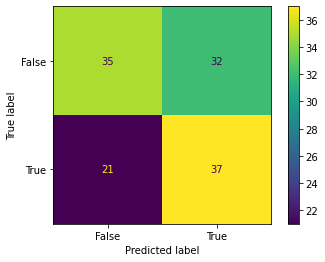

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

model  = svm.SVC(random_state = 3)

param = {'C': [1,2,4,6,8,10,15,20,30]}
svm_cv = GridSearchCV(model, param, cv=5)
svm_cv.fit(X_train, y_train)

print('Best hyperparameter setting: {0}.'.format(svm_cv.best_params_))
print('Average training accuracy across folds of best hyperparameter setting: {0}.'.format(svm_cv.best_score_))
print('Validation dataset accuracy of best hyperparameter setting: {0}.'.format(svm_cv.score(X_val, y_val)))

svm_best = svm.SVC(random_state = 3, C = 30)
svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_val)
#df = pd.DataFrame.from_records(confusion_matrix(y_val, y_pred))
print('KNN Confusion matrix:')
ConfusionMatrixDisplay.from_predictions(y_val, y_pred)
plt.show()

We can see that training with a larger dataset on SVM has produced a better accuracy when C is set to 30. The confusion matrix also shows that the classifier is still confused. The actual classes in the rows and the predicted in the columns show that False (Star Wars) is almost evenly split, meaning theres an even chance a Star Wars song will be classified correctly or incorrectly. However, the classifier classifies True (Potter) correctly more than incorrectly. This means that it is more likely to class Star Wars correctly than Potter correctly.

# 9 Conclusions

In conclusion, it is not reliable to use the classifier for the machine learning problem. Ideally, every recording should be the same in tempo, and key and length of the song sample. Future work by 'regularising' the audio files may help improve accuracy, but would require human effort, for example, the files could be auto-tuned, stretched and cut to the same regulations in preprocessing.